In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import corner
import pymc3 as pm

params =  -0.525509606298 1.31256220367


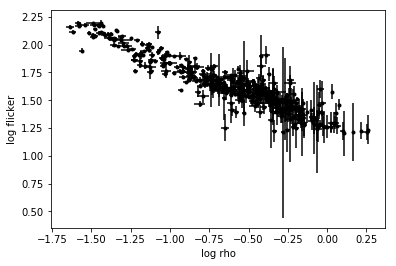

In [5]:
f, ferr, r, rerr = np.genfromtxt("flicker.txt").T
r -= 3  # convert rho to g/cm^3

# fit a line
AT = np.vstack((r, np.ones_like(r)))
ATA = np.dot(AT, AT.T)
m, c = np.linalg.solve(ATA, np.dot(AT, f))
print("params = ", m, c)
plt.errorbar(r, f, xerr=rerr, yerr=ferr, fmt="k.", capsize=0)
#plt.plot(xs, ys)
plt.ylabel("log flicker")
plt.xlabel("log rho")

In [41]:
with pm.Model() as uniform_model:
    alpha = pm.Normal('alpha',mu=0.,sd=10)
    beta = pm.Normal('beta',mu=0.,sd=10)
    s = pm.Uniform('s',lower=-10,upper=10)
    sd = np.sqrt(ferr**2 + rerr**2 + s**2)
    mu = alpha + beta * r
    y = pm.Normal('y',mu=mu,sd=sd,observed=f)

In [42]:
with uniform_model:
    params = pm.fit(n=50000,method='advi')
    samples = pm.sample_approx(params,draws=5000)

Average Loss = -314.59: 100%|██████████| 50000/50000 [00:06<00:00, 7477.81it/s]
Finished [100%]: Average Loss = -315.64


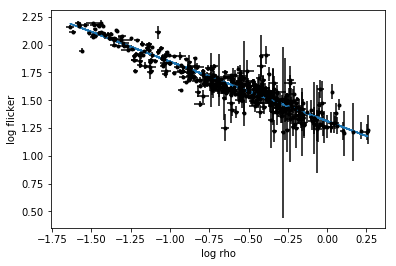

In [45]:
c = samples['alpha'].mean()
m = samples['beta'].mean()
plt.errorbar(r, f, xerr=rerr, yerr=ferr, fmt="k.", capsize=0)
plt.plot(r, m*r+c)
plt.ylabel("log flicker")
plt.xlabel("log rho")

In [44]:
print(m,c,samples['s'].mean())

-0.535606490932 1.31187970816 0.0473607007011


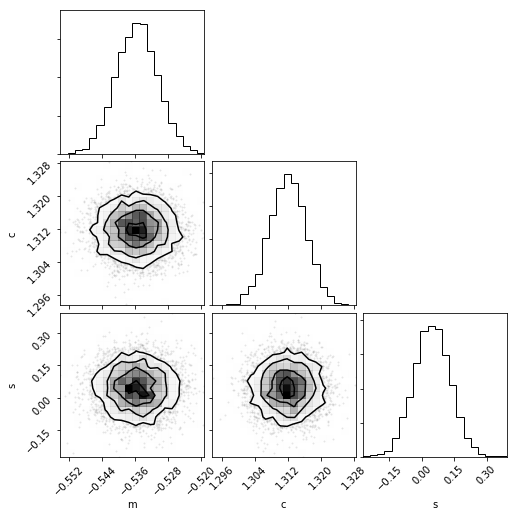

In [46]:
data_l = []
for a,b,c in zip(samples['beta'],samples['alpha'],samples['s']):
    data_l.append([a,b,c])
samples_np = np.asarray(data_l)

fig = corner.corner(samples_np, labels=["m", "c", "s"])

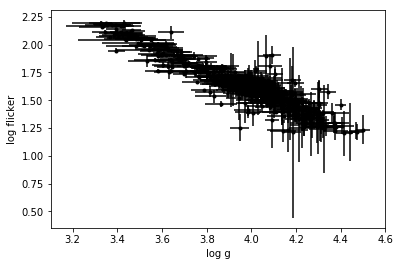

In [47]:
f, ferr, l, lerr, _, _ = np.genfromtxt("log.txt").T
plt.errorbar(l, f, xerr=lerr, yerr=ferr, fmt="k.", capsize=0)
plt.ylabel("log flicker")
plt.xlabel("log g")


In [48]:
with pm.Model() as log_model:
    alpha = pm.Normal('alpha',mu=0.,sd=10)
    beta = pm.Normal('beta',mu=0.,sd=10)
    s = pm.Uniform('s',lower=-10,upper=10)
    sd = np.sqrt(ferr**2 + rerr**2 + s**2)
    mu = alpha + beta * r
    y = pm.Normal('y',mu=mu,sd=sd,observed=f)

In [49]:
with uniform_model:
    params = pm.fit(n=50000,method='advi')
    samples = pm.sample_approx(params,draws=5000)

Average Loss = -313.21: 100%|██████████| 50000/50000 [00:07<00:00, 6543.89it/s] 
Finished [100%]: Average Loss = -315.03


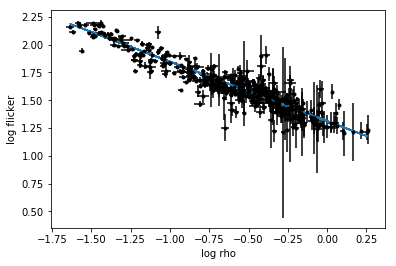

In [50]:
c = samples['alpha'].mean()
m = samples['beta'].mean()
plt.errorbar(r, f, xerr=rerr, yerr=ferr, fmt="k.", capsize=0)
plt.plot(r, m*r+c)
plt.ylabel("log flicker")
plt.xlabel("log rho")

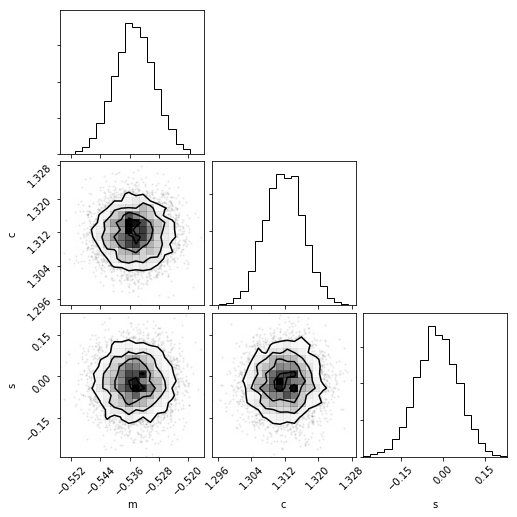

In [51]:
data_l = []
for a,b,c in zip(samples['beta'],samples['alpha'],samples['s']):
    data_l.append([a,b,c])
samples_np = np.asarray(data_l)

fig = corner.corner(samples_np, labels=["m", "c", "s"])